In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications.xception import Xception
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import model_from_json
from keras.models import load_model

json_file = open('/content/drive/MyDrive/model_xception/model.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/model_xception/model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
train_data_dir = '/content/drive/MyDrive/Data/Train'

validation_data_dir = '/content/drive/MyDrive/Data/Test'

IMAGE_SIZE = [224, 224]

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(validation_data_dir,

                                            target_size = (224, 224),

                                            batch_size = 32,

                                            class_mode = 'categorical')

Found 1050 images belonging to 21 classes.


In [ ]:
labels = test_set.class_indices
labels = list(labels.keys())
labels

['Ao quan',
 'Bau troi',
 'Bia sach',
 'Bien',
 'Cay coi',
 'Chup man hinh',
 'Dien thoai',
 'Do an',
 'Doi nui',
 'Dong ruong',
 'Duong pho',
 'Giay',
 'Hoa',
 'Hoa don',
 'Nguoi',
 'Selfie',
 'Song suoi ho',
 'Tai lieu',
 'Thu cung',
 'Toa nha',
 'Xe co']

In [ ]:
true_classes = test_set.classes

class_labels = labels

In [ ]:
predictions = loaded_model.predict(test_set)

predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
len(predicted_classes)

1050

In [ ]:
import numpy as np

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print(report)

               precision    recall  f1-score   support

      Ao quan       0.85      1.00      0.92        50
     Bau troi       0.80      0.78      0.79        50
     Bia sach       0.94      0.98      0.96        50
         Bien       0.73      0.90      0.80        50
      Cay coi       0.86      0.64      0.74        50
Chup man hinh       0.94      0.98      0.96        50
   Dien thoai       1.00      0.92      0.96        50
        Do an       0.98      0.90      0.94        50
      Doi nui       0.96      0.46      0.62        50
   Dong ruong       1.00      0.40      0.57        50
    Duong pho       0.75      0.96      0.84        50
         Giay       0.96      0.96      0.96        50
          Hoa       0.94      0.94      0.94        50
      Hoa don       0.85      0.90      0.87        50
        Nguoi       0.73      0.92      0.81        50
       Selfie       0.98      0.82      0.89        50
 Song suoi ho       0.54      0.72      0.62        50
     Tai 

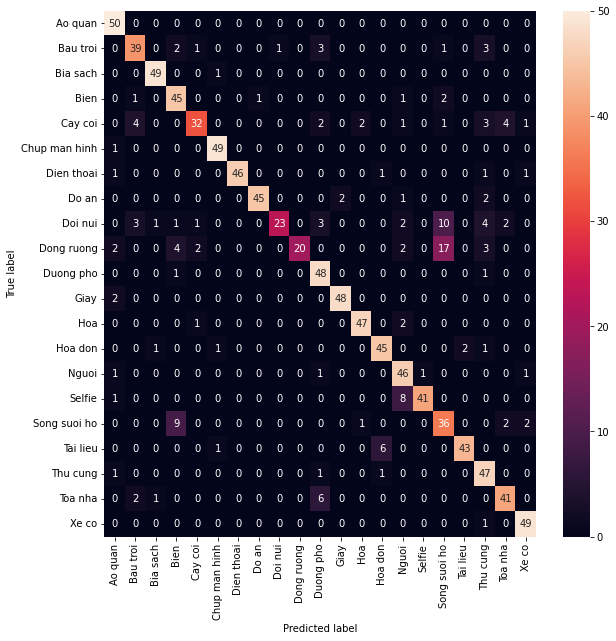

In [ ]:
import seaborn as sn

fig, ax = plt.subplots(figsize=(10,10))

sn.heatmap(confusion_matrix(y_true=true_classes, y_pred=predicted_classes),

           annot=True,

           fmt='.5g', 

           xticklabels=class_labels, 

           yticklabels=class_labels,)

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.subplots_adjust(left=0.15, bottom=0.15)

plt.savefig('xception_confusion_matrix.jpg')

